In [ ]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support

In [28]:
# Load dataset
data = pd.read_csv('./survey.csv')
# Drop unnecessary columns
data = data.drop(columns=['Timestamp', 'Martial Status', 'Studying in', 'GAD-7 Score', 'PHQ-9 Test'])
# Separate features and target
X = data.drop(columns=['GAD Result', 'PHQ Result'])
X.head()

,"1.Feeling nervous, anxious, or on edge",‎2.Not being able to stop or control worrying,‎3. Worrying too much about different things,4. Trouble relaxing,‎5. Being so restless that it is hard to sit still,6.Becoming easily annoyed or irritable,"‎7.Feeling afraid, as if something awful\nmight happen",‎1.Little interest or pleasure in doing things,"‎2. Feeling down, depressed, or hopeless","3.Trouble falling or staying asleep, or sleeping too much",‎4.Feeling tired or having little energy,5.Poor appetite or overeating,‎6.Feeling bad about yourself — or that you are a failure or\nhave let yourself or your family down,"‎7.Trouble concentrating on things, such as reading the\nnewspaper or watching television",‎8.Moving or speaking so slowly that other people could have\nnoticed? Or the opposite — being so fidgety or restless\nthat you have been moving around a lot more than usua,‎9.Thoughts that you would be better off dead or of hurting\nyourself in some way
0,1,2,1,1,0,1,2,3,0,2,2,1,0,2,0,3
1,1,1,1,1,0,1,2,1,2,0,3,0,2,3,2,1
2,1,2,1,2,1,0,0,2,2,1,2,1,2,1,0,3
3,3,1,3,3,1,1,3,3,2,3,3,3,3,2,1,1
4,1,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0


In [29]:
x_gad = X.iloc[:,:7]
x_gad.head()

,"1.Feeling nervous, anxious, or on edge",‎2.Not being able to stop or control worrying,‎3. Worrying too much about different things,4. Trouble relaxing,‎5. Being so restless that it is hard to sit still,6.Becoming easily annoyed or irritable,"‎7.Feeling afraid, as if something awful\nmight happen"
0,1,2,1,1,0,1,2
1,1,1,1,1,0,1,2
2,1,2,1,2,1,0,0
3,3,1,3,3,1,1,3
4,1,0,0,1,0,0,0


In [30]:
x_phq = X.iloc[:,7:16]
x_phq.head()

,‎1.Little interest or pleasure in doing things,"‎2. Feeling down, depressed, or hopeless","3.Trouble falling or staying asleep, or sleeping too much",‎4.Feeling tired or having little energy,5.Poor appetite or overeating,‎6.Feeling bad about yourself — or that you are a failure or\nhave let yourself or your family down,"‎7.Trouble concentrating on things, such as reading the\nnewspaper or watching television",‎8.Moving or speaking so slowly that other people could have\nnoticed? Or the opposite — being so fidgety or restless\nthat you have been moving around a lot more than usua,‎9.Thoughts that you would be better off dead or of hurting\nyourself in some way
0,3,0,2,2,1,0,2,0,3
1,1,2,0,3,0,2,3,2,1
2,2,2,1,2,1,2,1,0,3
3,3,2,3,3,3,3,2,1,1
4,0,0,0,2,0,0,0,0,0


C:\Users\anami\AppData\Local\Temp\ipykernel_6932\2022971538.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(x=data['GAD Result'], palette='viridis')
C:\Users\anami\AppData\Local\Temp\ipykernel_6932\2022971538.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(wrapped_labels, rotation=0, ha="center")
C:\Users\anami\AppData\Local\Temp\ipykernel_6932\2022971538.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(x=data['PHQ Result'], palette='magma')
C:\Users\anami\AppData\Local\Temp\ipykernel_6932\2022971538.py:21: UserWarning: set_ticklabels() should only be used wi

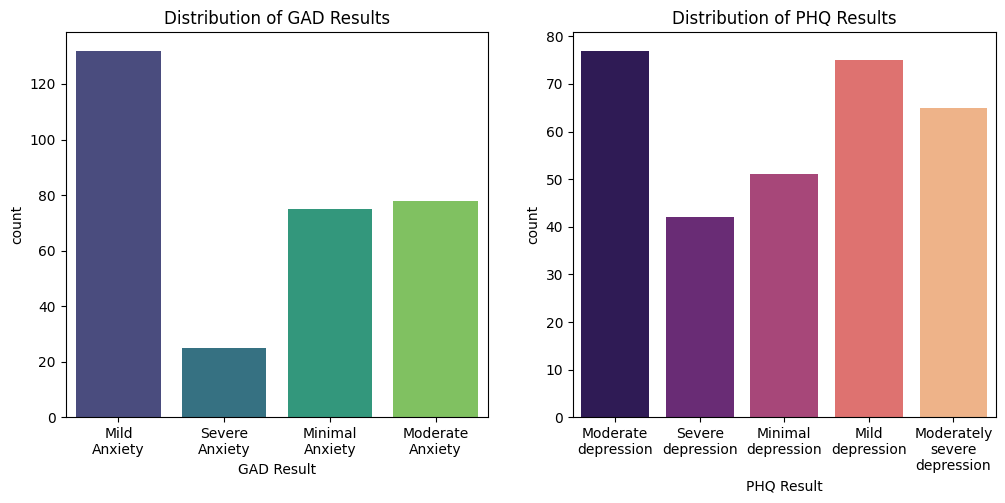

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
ax1 = sns.countplot(x=data['GAD Result'], palette='viridis')
plt.title('Distribution of GAD Results')
# Wrap x-axis labels
wrapped_labels = [textwrap.fill(label, width=10) for label in data['GAD Result'].unique()]
ax1.set_xticklabels(wrapped_labels, rotation=0, ha="center")


plt.subplot(1, 2, 2)
ax2 = sns.countplot(x=data['PHQ Result'], palette='magma')
plt.title('Distribution of PHQ Results')

# Wrap x-axis labels
wrapped_labels = [textwrap.fill(label, width=10) for label in data['PHQ Result'].unique()]
ax2.set_xticklabels(wrapped_labels, rotation=0, ha="center")

plt.show()


SVM GAD Accuracy: 0.95
GAD Precision: 0.96, Recall: 0.95, F1-score: 0.95
GAD Classification Report for SVM:
                   precision    recall  f1-score   support

    Mild Anxiety       1.00      0.93      0.96        29
 Minimal Anxiety       1.00      1.00      1.00        13
Moderate Anxiety       0.83      1.00      0.91        15
  Severe Anxiety       1.00      0.80      0.89         5

        accuracy                           0.95        62
       macro avg       0.96      0.93      0.94        62
    weighted avg       0.96      0.95      0.95        62



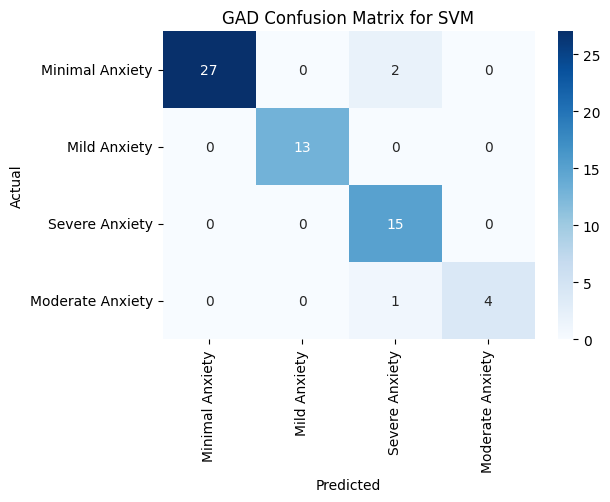

SVM PHQ Accuracy: 0.85
PHQ Precision: 0.89, Recall: 0.85, F1-score: 0.85
PHQ Classification Report for SVM:
                               precision    recall  f1-score   support

             Mild depression       1.00      0.84      0.91        19
          Minimal depression       0.80      1.00      0.89         8
         Moderate depression       0.87      1.00      0.93        13
Moderately severe depression       0.69      0.92      0.79        12
           Severe depression       1.00      0.50      0.67        10

                    accuracy                           0.85        62
                   macro avg       0.87      0.85      0.84        62
                weighted avg       0.89      0.85      0.85        62



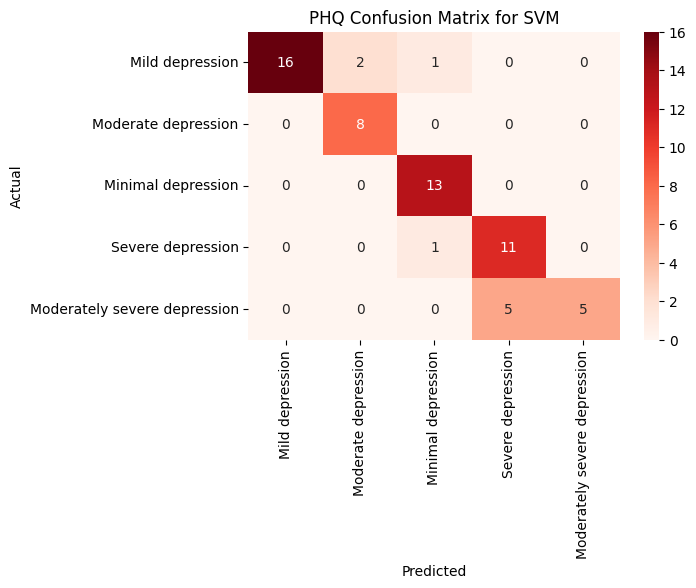

SVM PHQ Accuracy: 0.85
RandomForest GAD Accuracy: 0.90
GAD Precision: 0.92, Recall: 0.90, F1-score: 0.90
GAD Classification Report for RandomForest:
                   precision    recall  f1-score   support

    Mild Anxiety       1.00      0.83      0.91        29
 Minimal Anxiety       0.81      1.00      0.90        13
Moderate Anxiety       0.83      1.00      0.91        15
  Severe Anxiety       1.00      0.80      0.89         5

        accuracy                           0.90        62
       macro avg       0.91      0.91      0.90        62
    weighted avg       0.92      0.90      0.90        62



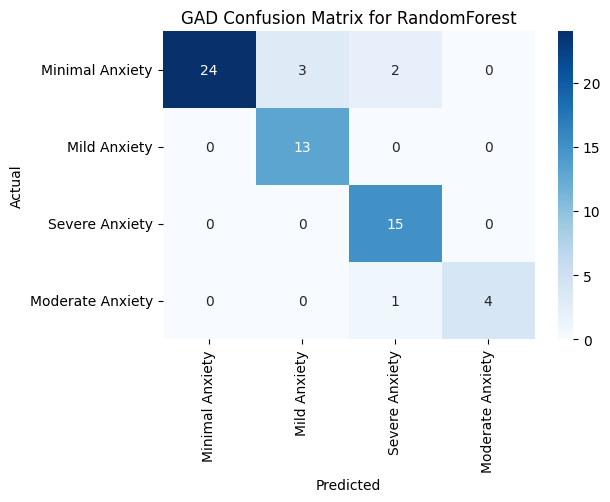

RandomForest PHQ Accuracy: 0.77
PHQ Precision: 0.79, Recall: 0.77, F1-score: 0.77
PHQ Classification Report for RandomForest:
                               precision    recall  f1-score   support

             Mild depression       0.88      0.74      0.80        19
          Minimal depression       0.70      0.88      0.78         8
         Moderate depression       0.77      0.77      0.77        13
Moderately severe depression       0.69      0.92      0.79        12
           Severe depression       0.86      0.60      0.71        10

                    accuracy                           0.77        62
                   macro avg       0.78      0.78      0.77        62
                weighted avg       0.79      0.77      0.77        62



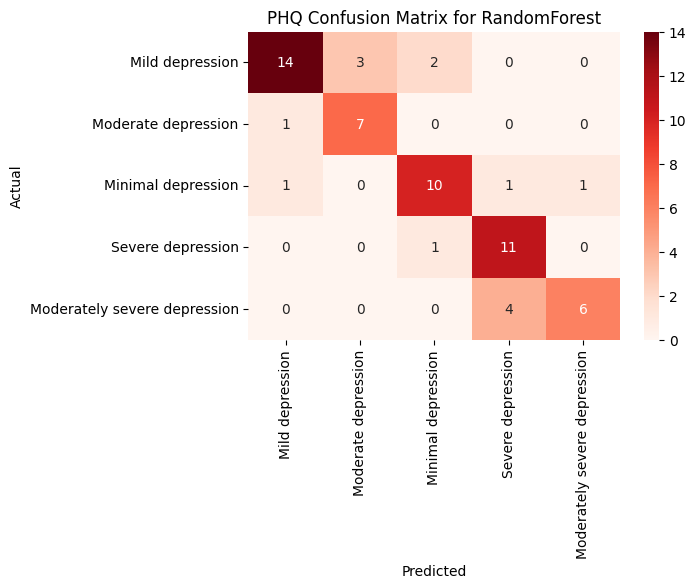

RandomForest PHQ Accuracy: 0.77
NaiveBayes GAD Accuracy: 0.92
GAD Precision: 0.94, Recall: 0.92, F1-score: 0.92
GAD Classification Report for NaiveBayes:
                   precision    recall  f1-score   support

    Mild Anxiety       1.00      0.86      0.93        29
 Minimal Anxiety       1.00      1.00      1.00        13
Moderate Anxiety       0.75      1.00      0.86        15
  Severe Anxiety       1.00      0.80      0.89         5

        accuracy                           0.92        62
       macro avg       0.94      0.92      0.92        62
    weighted avg       0.94      0.92      0.92        62



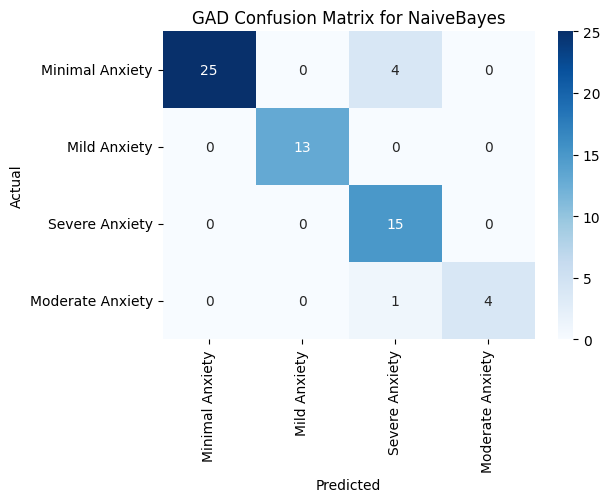

NaiveBayes PHQ Accuracy: 0.74
PHQ Precision: 0.83, Recall: 0.74, F1-score: 0.73
PHQ Classification Report for NaiveBayes:
                               precision    recall  f1-score   support

             Mild depression       1.00      0.58      0.73        19
          Minimal depression       0.53      1.00      0.70         8
         Moderate depression       0.81      1.00      0.90        13
Moderately severe depression       0.62      0.83      0.71        12
           Severe depression       1.00      0.40      0.57        10

                    accuracy                           0.74        62
                   macro avg       0.79      0.76      0.72        62
                weighted avg       0.83      0.74      0.73        62



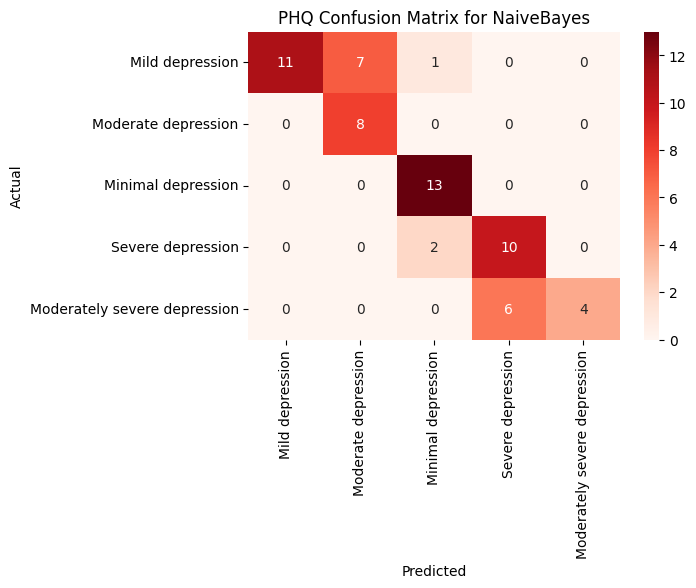

NaiveBayes PHQ Accuracy: 0.74
SGD GAD Accuracy: 0.90
GAD Precision: 0.91, Recall: 0.90, F1-score: 0.91
GAD Classification Report for SGD:
                   precision    recall  f1-score   support

    Mild Anxiety       0.96      0.86      0.91        29
 Minimal Anxiety       1.00      0.92      0.96        13
Moderate Anxiety       0.78      0.93      0.85        15
  Severe Anxiety       0.83      1.00      0.91         5

        accuracy                           0.90        62
       macro avg       0.89      0.93      0.91        62
    weighted avg       0.91      0.90      0.91        62



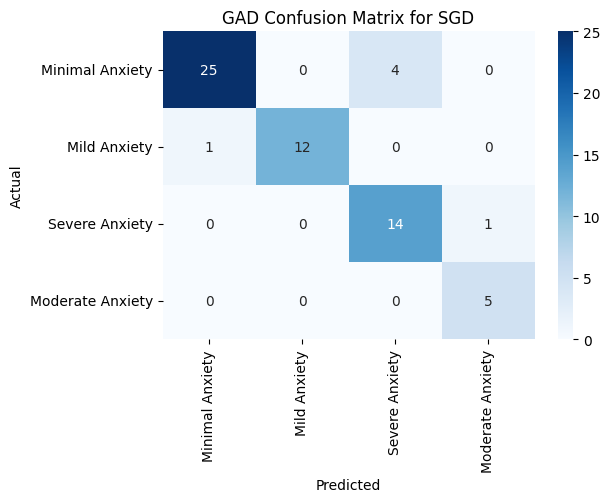

SGD PHQ Accuracy: 0.52
PHQ Precision: 0.53, Recall: 0.52, F1-score: 0.48
PHQ Classification Report for SGD:
                               precision    recall  f1-score   support

             Mild depression       0.50      0.21      0.30        19
          Minimal depression       0.89      1.00      0.94         8
         Moderate depression       0.30      0.69      0.42        13
Moderately severe depression       0.25      0.08      0.12        12
           Severe depression       0.91      1.00      0.95        10

                    accuracy                           0.52        62
                   macro avg       0.57      0.60      0.55        62
                weighted avg       0.53      0.52      0.48        62



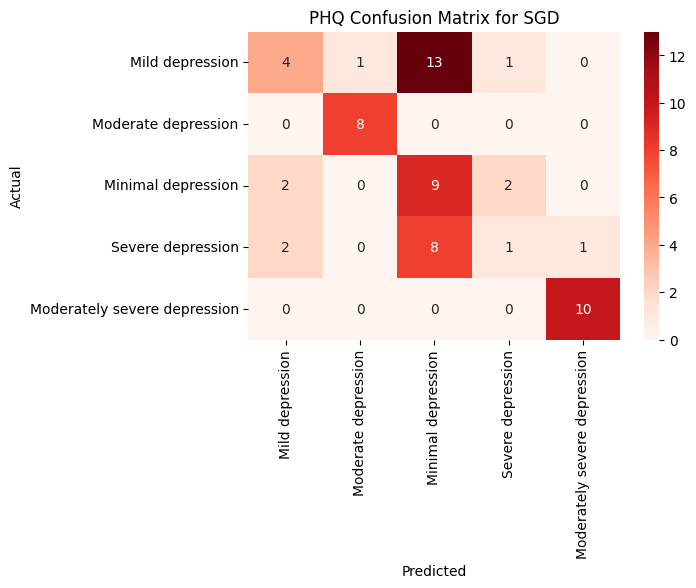

SGD PHQ Accuracy: 0.52
Model training and evaluation completed.


In [48]:
y_gad = data['GAD Result']
y_phq = data['PHQ Result']

# Split data into training and testing sets
x_gad_train, x_gad_test, y_gad_train, y_gad_test = train_test_split(x_gad, y_gad, test_size=0.2, random_state=42)
x_phq_train, x_phq_test, y_phq_train, y_phq_test = train_test_split(x_phq, y_phq, test_size=0.2, random_state=42)

# Scale features
scaler_gad = StandardScaler()
scaler_phq = StandardScaler()

x_gad_train = scaler_gad.fit_transform(x_gad_train)
x_gad_test = scaler_gad.transform(x_gad_test)

x_phq_train = scaler_phq.fit_transform(x_phq_train)
x_phq_test = scaler_phq.transform(x_phq_test)

with open('./scalers/scaler_gad.pkl', 'wb') as f:
    pickle.dump(scaler_gad, f)

with open('./scalers/scaler_phq.pkl', 'wb') as f:
    pickle.dump(scaler_phq, f)

# Define models
models = {
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier(),
    'NaiveBayes': GaussianNB(),
    'SGD': SGDClassifier()
}

# Train, evaluate, and save models
for name, model in models.items():
    # Train on GAD Result
    model.fit(x_gad_train, y_gad_train)
    y_pred_gad = model.predict(x_gad_test)
    accuracy_gad = accuracy_score(y_gad_test, y_pred_gad)
    precision, recall, f1, _ = precision_recall_fscore_support(y_gad_test, y_pred_gad, average='weighted')
    print(f'{name} GAD Accuracy: {accuracy_gad:.2f}')
    print(f'GAD Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}')
    print(f'GAD Classification Report for {name}:\n', classification_report(y_gad_test, y_pred_gad))
    
    # Confusion Matrix Visualization
    cm = confusion_matrix(y_gad_test, y_pred_gad)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_gad_test.unique(), yticklabels=y_gad_test.unique())
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'GAD Confusion Matrix for {name}')
    plt.show()
    
    # Save model
    with open(f'./classification_models/{name}_GAD.pkl', 'wb') as f:
        pickle.dump(model, f)
    
    # Train on PHQ Result
    model.fit(x_phq_train, y_phq_train)
    y_pred_phq = model.predict(x_phq_test)
    accuracy_phq = accuracy_score(y_phq_test, y_pred_phq)
    precision, recall, f1, _ = precision_recall_fscore_support(y_phq_test, y_pred_phq, average='weighted')
    print(f'{name} PHQ Accuracy: {accuracy_phq:.2f}')
    print(f'PHQ Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}')
    print(f'PHQ Classification Report for {name}:\n', classification_report(y_phq_test, y_pred_phq))
    
    # Confusion Matrix Visualization
    cm = confusion_matrix(y_phq_test, y_pred_phq)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=y_phq_test.unique(), yticklabels=y_phq_test.unique())
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'PHQ Confusion Matrix for {name}')
    plt.show()
    print(f'{name} PHQ Accuracy: {accuracy_phq:.2f}')
    
    # Save model
    with open(f'./classification_models/{name}_PHQ.pkl', 'wb') as f:
        pickle.dump(model, f)

print("Model training and evaluation completed.")


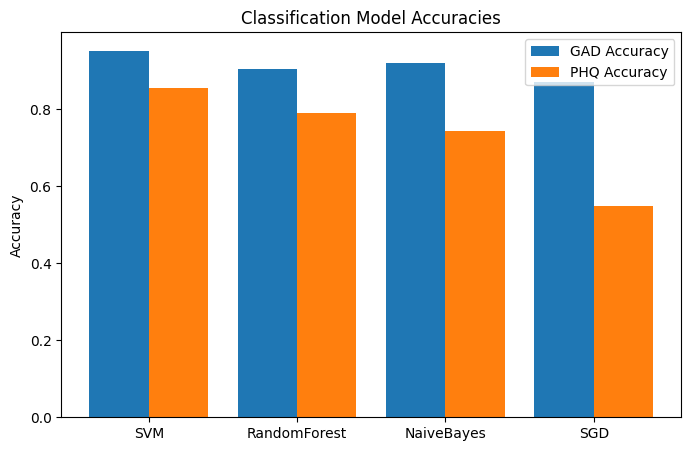

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy data
models = ['SVM', 'RandomForest', 'NaiveBayes', 'SGD']
gad_accuracies = [accuracy_score(y_gad_test, pickle.load(open(f'./classification_models/{m}_GAD.pkl', 'rb')).predict(x_gad_test)) for m in models]
phq_accuracies = [accuracy_score(y_phq_test, pickle.load(open(f'./classification_models/{m}_PHQ.pkl', 'rb')).predict(x_phq_test)) for m in models]

x = np.arange(len(models))

plt.figure(figsize=(8, 5))
plt.bar(x - 0.2, gad_accuracies, 0.4, label='GAD Accuracy')
plt.bar(x + 0.2, phq_accuracies, 0.4, label='PHQ Accuracy')

plt.xticks(x, models)
plt.ylabel('Accuracy')
plt.title('Classification Model Accuracies')
plt.legend()
plt.show()


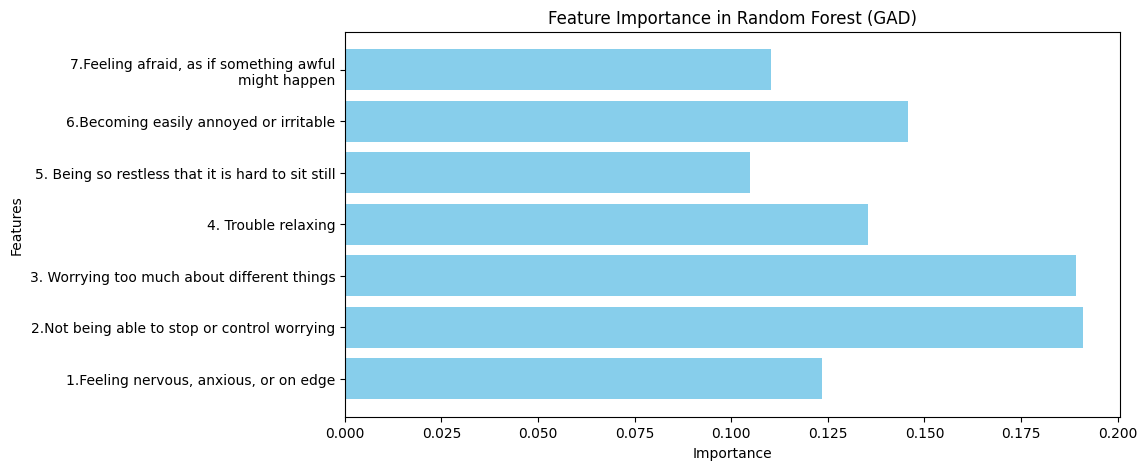

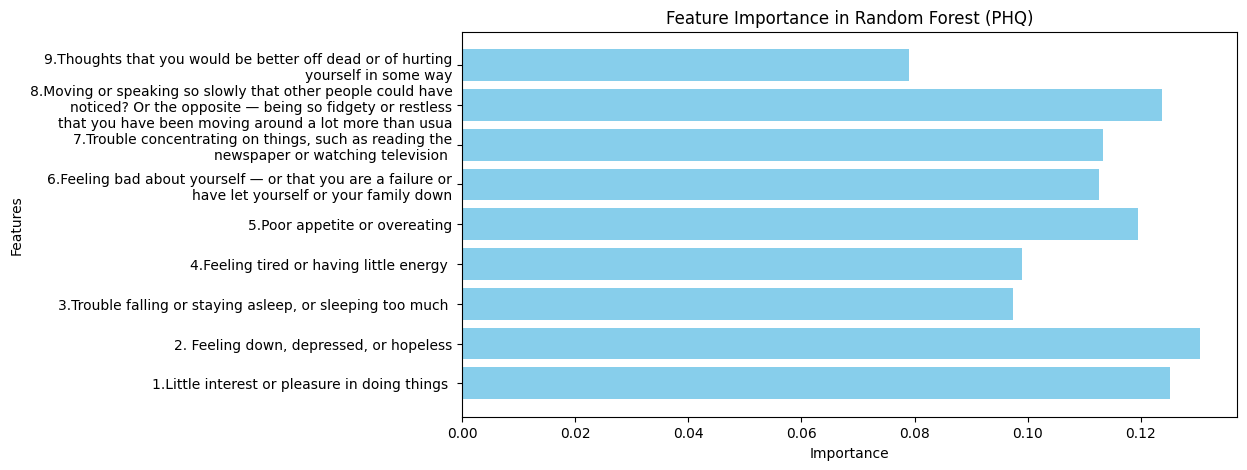

In [34]:
rf_model = pickle.load(open('./classification_models/RandomForest_GAD.pkl', 'rb'))
feature_importance = rf_model.feature_importances_

plt.figure(figsize=(10, 5))
plt.barh(x_gad.columns, feature_importance, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest (GAD)')
plt.show()

rf_model = pickle.load(open('./classification_models/RandomForest_PHQ.pkl', 'rb'))
feature_importance = rf_model.feature_importances_

plt.figure(figsize=(10, 5))
plt.barh(x_phq.columns, feature_importance, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest (PHQ)')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



AttributeError: 'list' object has no attribute 'items'

In [10]:
import pandas as pd
import pickle
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pickle

In [11]:
# Load dataset
data = pd.read_csv('./synthetic_mental_health_data.csv')

# Preprocessing
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data[['Diagnosis', 'Type of Help']]).toarray()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_data)

# Model Training & Evaluation
models = {
    'KMeans': KMeans(n_clusters=9, random_state=42, n_init=15),
    'Hierarchical': AgglomerativeClustering(n_clusters=9),
    'GMM': GaussianMixture(n_components=9, random_state=42)
}

results = {}
for name, model in models.items():
    clusters = model.fit_predict(scaled_data)
    silhouette = silhouette_score(scaled_data, clusters)
    davies_bouldin = davies_bouldin_score(scaled_data, clusters)
    results[name] = {'Silhouette Score': silhouette, 'Davies-Bouldin Index': davies_bouldin}
    with open(f'./clustering_models/{name}_model.pkl', 'wb') as f:
        pickle.dump(model, f)

# KNN Model for Recommendations
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_data, data['Suggestion'])
with open('./clustering_models/KNN_model.pkl', 'wb') as f:
    pickle.dump(knn, f)

# Save encoders and scalers
with open('./scalers/encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)
with open('./scalers/scaler_clusters.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Print Evaluation Results
print(pd.DataFrame(results))

                        KMeans  Hierarchical       GMM
Silhouette Score      0.761815      0.761815  0.761815
Davies-Bouldin Index  0.597482      0.597482  0.597482


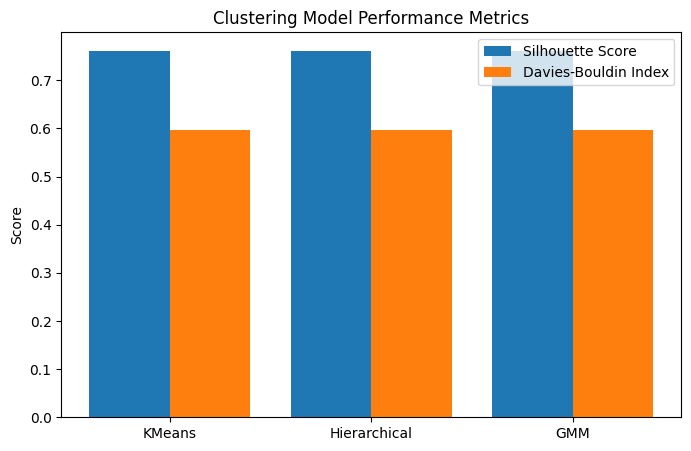

In [12]:
# Extracting metrics
clustering_models = ['KMeans', 'Hierarchical', 'GMM']
silhouette_scores = [results[m]['Silhouette Score'] for m in clustering_models]
davies_bouldin_scores = [results[m]['Davies-Bouldin Index'] for m in clustering_models]

x = np.arange(len(clustering_models))

plt.figure(figsize=(8, 5))
plt.bar(x - 0.2, silhouette_scores, 0.4, label='Silhouette Score')
plt.bar(x + 0.2, davies_bouldin_scores, 0.4, label='Davies-Bouldin Index')

plt.xticks(x, clustering_models)
plt.ylabel('Score')
plt.title('Clustering Model Performance Metrics')
plt.legend()
plt.show()


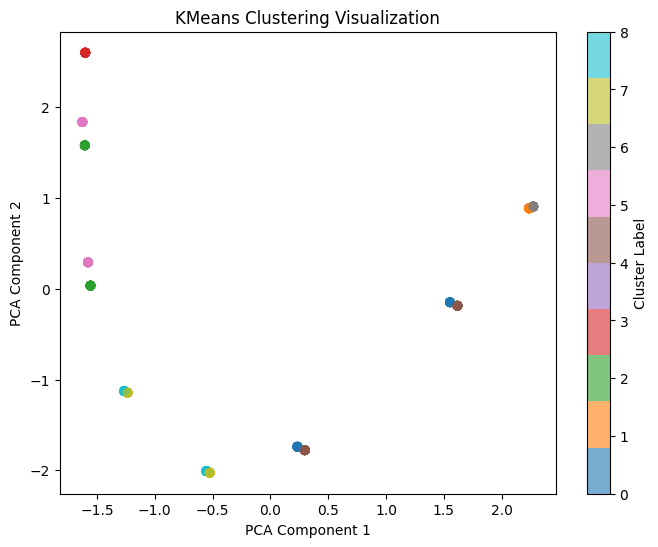

In [13]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Get cluster labels from KMeans
kmeans_clusters = pickle.load(open('./clustering_models/KMeans_model.pkl', 'rb')).predict(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_clusters, cmap='tab10', alpha=0.6)
plt.colorbar(label="Cluster Label")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KMeans Clustering Visualization")
plt.show()
